In [19]:
import modelib as ml
import openturns as ot
import openturns.viewer as viewer

In [47]:
fp = 'exon.txt'
exons = ml.read_txt_seqs(fp)
data = ml.get_exinbins(exons, 5)[2]
print(max(data))
# max exon value is 2921
# max intron size is 5862

2921


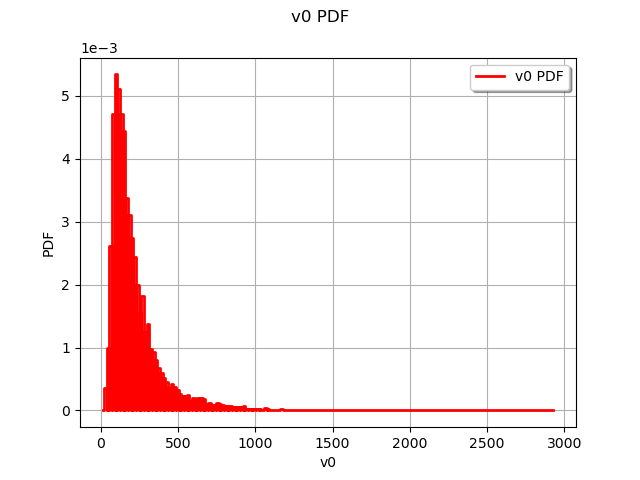

In [48]:
sample = ot.Sample([[x] for x in data if x < 1000])
samp = ot.Sample([[x] for x in data])
ot.HistogramFactory().build(samp).drawPDF()

In [49]:
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print(myDistribution)
print(myDistribution.getActualDistribution())

GeneralizedExtremeValue(mu=133.302, sigma=75.4486, xi=0.330936)
Frechet(beta = 227.986, alpha = 3.02173, gamma = -94.6838)


WRN - Switch to finite difference to compute the gradient at point=[1.1924e+07,-14359,-1.19242e+07]
WRN - Switch to finite difference to compute the gradient at point=[1.60719e+07,-55309.7,-1.60722e+07]
WRN - TNC went to an abnormal point x=[nan,nan,nan] y=[] msg=TNC got a nan input value


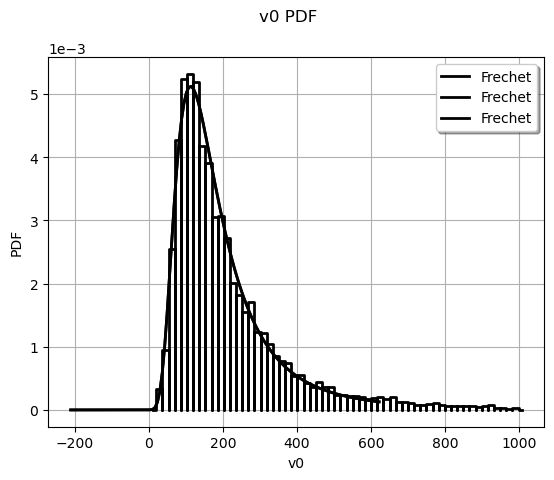

In [50]:
graph = ot.HistogramFactory().build(sample).drawPDF()
graph.add(myDistribution.drawPDF())

distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
graph.add(myDistribution.drawPDF())

graph.setColors(["black"])
graph.setLegends(["Frechet"])
graph.setLegendPosition("topright")

view = viewer.View(graph)